## Binary Classification

In [ ]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, random_state=1)
# summarize dataset shape
print(X.shape, y.shape)
# summarize observations by class label
counter = Counter(y)
print(counter)
# summarize first few examples
for i in range(10):
    print(X[i], y[i])

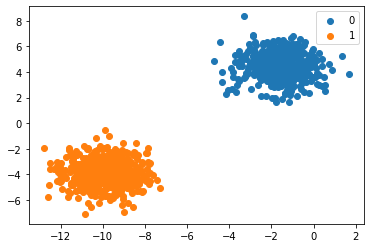

In [2]:
# plot the dataset and color the by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
pyplot.legend()
pyplot.show()

## Multi-Class Classification

(1000, 2) (1000,)
Counter({1: 250, 2: 250, 0: 250, 3: 250})
[-10.45765533  -3.30899488] 1
[-5.90962043 -7.80717036] 2
[-1.00497975  4.35530142] 0
[-6.63784922 -4.52085249] 3
[-6.3466658  -8.89940182] 2
[-4.67047183 -3.35527602] 3
[-5.62742066 -1.70195987] 3
[-6.91064247 -2.83731201] 3
[-1.76490462  5.03668554] 0
[-8.70416288 -4.39234621] 1


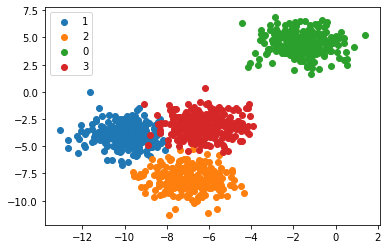

In [3]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
# define dataset
X, y = make_blobs(n_samples=1000, centers=4, random_state=10)
# summarize dataset shape
print(X.shape, y.shape)
# summarize observations by class label
counter = Counter(y)
print(counter)
# summarize first few examples
for i in range(10):
    print(X[i], y[i])
# plot the dataset and color the by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


In [5]:
# example of a multi-label classification task
from sklearn.datasets import make_multilabel_classification
# define dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=2, n_classes=3, n_labels=2, random_state=1)
# summarize dataset shape
print(X.shape, y.shape)
# summarize first few examples
for i in range(10):
    print(X[i], y[i])


(1000, 2) (1000, 3)
[18. 35.] [1 1 1]
[22. 33.] [1 1 1]
[26. 36.] [1 1 1]
[24. 28.] [1 1 0]
[23. 27.] [1 1 0]
[15. 31.] [0 1 0]
[20. 37.] [0 1 0]
[18. 31.] [1 1 1]
[29. 27.] [1 0 0]
[29. 28.] [1 1 0]


## Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1=pd.read_csv('sample_data_original.csv')

In [3]:
df1.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [4]:
df=pd.read_csv('sample_data.csv')

In [5]:
df.head()

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. < 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,...,msr_bin_b. Mid,msr_bin_c. High,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,race_sex_bin_b. Mid,race_sex_bin_c. High,flag,y
0,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1,train,0
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,train,0
2,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,train,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,train,0
4,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,train,0


In [6]:
df.shape

(48842, 24)

In [7]:
train=df[df['flag']=='train']
test=df[df['flag']=='test']

In [8]:
train.head()

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. < 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,...,msr_bin_b. Mid,msr_bin_c. High,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,race_sex_bin_b. Mid,race_sex_bin_c. High,flag,y
0,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1,train,0
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,train,0
2,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,train,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,train,0
4,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,train,0


In [9]:
test.head()

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. < 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,...,msr_bin_b. Mid,msr_bin_c. High,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,race_sex_bin_b. Mid,race_sex_bin_c. High,flag,y
32561,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,test,0
32562,0,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,test,0
32563,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,test,1
32564,0,0,0,1,0,1,1,0,0,0,...,0,1,1,0,0,0,1,0,test,1
32565,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,test,0


In [10]:
print(train.shape, test.shape)

(32561, 24) (16281, 24)


In [11]:
y_train=train['y']
x_train=train.drop(['flag','y'], axis=1)

In [12]:
x_train

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. < 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,...,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,msr_bin_b. Mid,msr_bin_c. High,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,race_sex_bin_b. Mid,race_sex_bin_c. High
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
32557,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
32558,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
32559,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [13]:
y_test=test['y']
x_test=test.drop(['flag', 'y'], axis=1)

In [14]:
x_test

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. < 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,...,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,msr_bin_b. Mid,msr_bin_c. High,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,race_sex_bin_b. Mid,race_sex_bin_c. High
32561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32562,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1
32563,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
32564,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
32565,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
48838,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
48839,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
48840,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(x_train, y_train)

LogisticRegression()

In [21]:
y_pred_lr=lr.predict(x_test)

In [22]:
y_pred_lr

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [23]:
y_test

32561    0
32562    0
32563    1
32564    1
32565    0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: y, Length: 16281, dtype: int64

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [20]:
y_pred_knn=knn.predict(x_test)

In [24]:
y_pred_knn

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

## SVM

In [25]:
from sklearn.svm import SVC

sv=SVC(kernel='linear', random_state=101)

sv.fit(x_train, y_train)

SVC(kernel='linear', random_state=101)

In [26]:
y_pred_sv=sv.predict(x_test)

In [27]:
y_pred_sv

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

## naive bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb=nb.predict(x_test)
y_pred_nb

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

## Evaluation Metrics

## accuracy

In [30]:
from sklearn.metrics import accuracy_score

In [32]:
print('Logit Accuracy: ',accuracy_score(y_test, y_pred_lr))

Logit Accuracy:  0.8458939868558443


In [33]:
print('KNN Accuracy: ',accuracy_score(y_test, y_pred_knn))

KNN Accuracy:  0.8290645537743382


In [34]:
print('Naive Bayes Accuracy: ',accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy:  0.8010564461642405


In [36]:
print('SVM Accuracy: ',accuracy_score(y_test, y_pred_sv))

SVM Accuracy:  0.8393219089736502


## f1 score

In [39]:
from sklearn.metrics import f1_score
print('Logit F1 score: ',f1_score(y_test, y_pred_lr))

Logit F1 score:  0.6336691487808439


In [40]:
print('KNN F1 score: ',f1_score(y_test, y_pred_knn))

KNN F1 score:  0.5581838387045563


In [41]:
print('Naive Bayes F1 score: ',f1_score(y_test, y_pred_nb))

Naive Bayes F1 score:  0.6004687307265326


In [42]:
print('SVM F1 score: ',f1_score(y_test, y_pred_sv))

SVM F1 score:  0.6109458655562165


## Log Loss

In [43]:
from sklearn.metrics import log_loss
print('Logit Log Loss: ',log_loss(y_test, y_pred_lr))

Logit Log Loss:  5.322674039646844


In [44]:
print('KNN Log Loss: ',log_loss(y_test, y_pred_knn))

KNN Log Loss:  5.903935288204067


In [45]:
print('Naive Bayes Log Loss: ',log_loss(y_test, y_pred_nb))

Naive Bayes Log Loss:  6.871356649322564


In [46]:
print('SVM Log Loss: ',log_loss(y_test, y_pred_sv))

SVM Log Loss:  5.549665126059138


## Jaccard Index

In [47]:
from sklearn.metrics import jaccard_score
print('Logit jaccard: ',jaccard_score(y_test, y_pred_lr))

Logit jaccard:  0.4637743107501603


In [48]:
print('KNN jaccard: ',jaccard_score(y_test, y_pred_knn))
print('Naive Bayes jaccard: ',jaccard_score(y_test, y_pred_nb))
print('SVM jaccard: ',jaccard_score(y_test, y_pred_sv))

KNN jaccard:  0.3871393966086765
Naive Bayes jaccard:  0.4290498854221752
SVM jaccard:  0.4398286937901499


## Confusion Metrics

In [49]:
from sklearn.metrics import confusion_matrix

Logit:  [[11602   833]
 [ 1676  2170]]


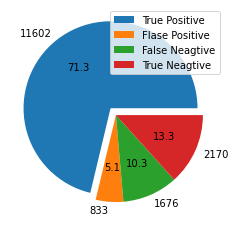

In [68]:
print('Logit: ',confusion_matrix(y_test, y_pred_lr))
cm=confusion_matrix(y_test, y_pred_lr)
plt.pie(cm.flatten(), autopct='%1.1f', explode=[0.1,0,0,0], labels=cm.flatten())
plt.legend(labels=['True Positive','Flase Positive','False Neagtive','True Neagtive'], loc='best')

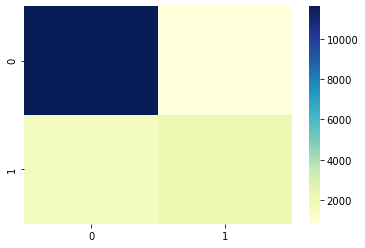

In [71]:
import seaborn as sns
sns.heatmap(cm, cmap='YlGnBu')

In [59]:
print('KNN',confusion_matrix(y_test, y_pred_knn))

KNN [[11740   695]
 [ 2088  1758]]


In [60]:
print('Naive Bayes: ',confusion_matrix(y_test, y_pred_nb))

Naive Bayes:  [[10608  1827]
 [ 1412  2434]]


In [61]:
print('SVM',confusion_matrix(y_test, y_pred_sv))

SVM [[11611   824]
 [ 1792  2054]]
